In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd

# Load data

In [2]:
from plot_utils import *

In [4]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

## xj={0}

In [ ]:
CT_En2000_pctrl(0.00,0.00,1)_pproj(0.21,0.21,1)_L(16,18,2)_xj(0)_seed1_64.pickle

In [23]:
params_list=[
({'xj':'0','en':2000,'anc':False},{'p_ctrl':np.linspace(0,1.0,101),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([8,12,16])}),
({'xj':'0','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
({'xj':'0','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
({'xj':'0','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','p_ctrl','p_proj'])


Loading data_dict Data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 36966/36966 [00:01<00:00, 36086.89it/s]


Loading data_dict Data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 7442/7442 [00:00<00:00, 45069.24it/s]


Loading data_dict Data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 14884/14884 [00:00<00:00, 43298.70it/s]


Loading data_dict Data/Metrics/0/xj(0).pickle


generate_params: 100%|██████████| 119072/119072 [00:02<00:00, 42805.23it/s]


In [25]:
len(data_0_dict['fn'])

14170

In [26]:
all_files=set(os.listdir('Data/Metrics/0'))

In [27]:
len(all_files)

14176

In [28]:
[fn for fn in all_files-data_0_dict['fn']]

['CT_En200_pctrl(0.06,0.06,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle',
 'CT_En14_pctrl(0.00,0.00,1)_pproj(0.00,0.00,1)_L(24,26,2)_xj(0)_seed0_64.pickle',
 'CT_En200_pctrl(0.03,0.03,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle',
 'xj(0).pickle.bak',
 'xj(0).pickle',
 'CT_En200_pctrl(0.00,0.00,1)_pproj(0.00,0.00,1)_L(20,22,2)_xj(0)_seed0_64.pickle']

In [29]:
df_0

observations
Metrics L  p_ctrl p_proj                                                   
TMI     8  0.00   0.0     [-1.4030428, -1.377281, -1.3532763, -1.3203242...
O       8  0.00   0.0     [-0.039820373, 0.012490723, -0.019202381, -0.0...
EE      8  0.00   0.0     [2.2743473, 2.2730627, 2.2817113, 2.162693, 2....
TMI     12 0.00   0.0     [-2.6776414, -2.709238, -2.7088358, -2.6834512...
O       12 0.00   0.0     [-0.0056516156, 0.0030403486, -0.0073371283, -...
...                                                                     ...
        8  0.95   0.0     [1.0, 1.0, 1.0, 1.0, 1.0, 0.9832215, 1.0, 1.0,...
EE      8  0.95   0.0     [1.2433962e-33, 1.2433962e-33, 1.2433962e-33, ...
TMI     8  1.00   0.0     [-2.7354716e-33, -2.7354716e-33, -2.7354716e-3...
O       8  1.00   0.0     [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
EE      8  1.00   0.0     [1.2433962e-33, 1.2433962e-33, 1.2433962e-33, ...

[8133 rows x 1 columns]

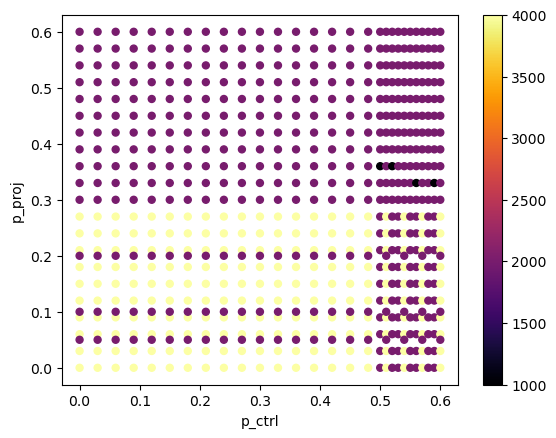

In [30]:
visualize_dataset(df_0,params={'Metrics':'O','L':20},xlabel='p_ctrl',ylabel='p_proj')